In [1]:
print "hello"

hello


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv("/Users/soham/Desktop/DSF/properties_2016.csv")
data.shape

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [66]:
train=pd.read_csv("/Users/soham/Desktop/DSF/train_2016_v2.csv")

Q1) Do a pairwise Pearson correlation analysis on all interesting pairs of variables. Show the result with heat map and find out most positive and negative correlations.


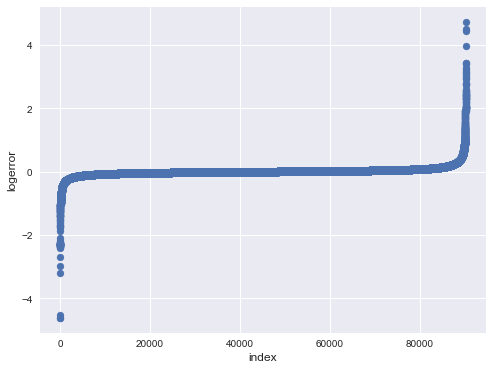

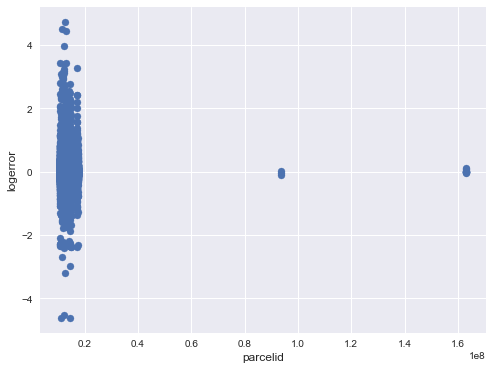

In [209]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train["logerror"]))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(train['parcelid'], np.sort(train["logerror"]))
plt.xlabel('parcelid', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [383]:
#finding the null values in each column

data.isnull().sum(axis=0)

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [384]:
# #Finding Missing Values of a Row
# missingvaluesrows = data.isnull().sum(axis=1).reset_index()
# missingvaluesrows.columns = ["row", "isanull"]
# missingvaluesrows["ratio"]= missingvaluesrows["isanull"]/data.shape[1]
# missingvaluesrows

# #Finding rows that have more than 90 percent NaN values
# missingvaluesrows.ix[missingvaluesrows["ratio"]>0.90]


# #Delete the rows that have more than 90percent NaN values
# deleterows = missingvaluesrows.ix[missingvaluesrows["ratio"]>0.90]

# data.drop(data.index[deleterows["row"]], inplace=True)


# #New Shape of the data after the row deletion
# data.shape

In [6]:
#Finding the number of Nan in each column

missingvaluescols = data.isnull().sum(axis=0).reset_index()
missingvaluescols.columns = ["name", "missingcount"]


#missingvaluescols = missingvaluescols.ix[missingvaluescols['missingcount']>0]
#missingvaluescols=missingvaluescols.sort_values(by='missingcount')


missingvaluescols["ratio"]= (missingvaluescols['missingcount']*100/data.shape[0])

missingvaluescols

,name,missingcount,ratio
0,parcelid,0,0.000000
1,airconditioningtypeid,2173698,72.815410
2,architecturalstyletypeid,2979156,99.796966
3,basementsqft,2983589,99.945465
4,bathroomcnt,11462,0.383959
5,bedroomcnt,11450,0.383557
6,buildingclasstypeid,2972588,99.576949
7,buildingqualitytypeid,1046729,35.063749
8,calculatedbathnbr,128912,4.318346
9,decktypeid,2968121,99.427311


In [7]:
#Finding columns that have more than 98 percent NaN values

missingvaluescols = missingvaluescols.ix[missingvaluescols['ratio']>98]
missingvaluescols

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,name,missingcount,ratio
2,architecturalstyletypeid,2979156,99.796966
3,basementsqft,2983589,99.945465
6,buildingclasstypeid,2972588,99.576949
9,decktypeid,2968121,99.427311
13,finishedsquarefeet13,2977545,99.743000
16,finishedsquarefeet6,2963216,99.263002
28,poolsizesum,2957257,99.063385
29,pooltypeid10,2948278,98.762603
30,pooltypeid2,2953142,98.925539
41,storytypeid,2983593,99.945599


In [8]:
#Delete the columns that have more than 98 percent NaN values

missingvaluescols = missingvaluescols.ix[missingvaluescols['ratio']>98]
data.drop(missingvaluescols["name"], axis=1, inplace=True)
data.shape


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


(2985217, 43)

In [9]:
train.shape

(90275, 3)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


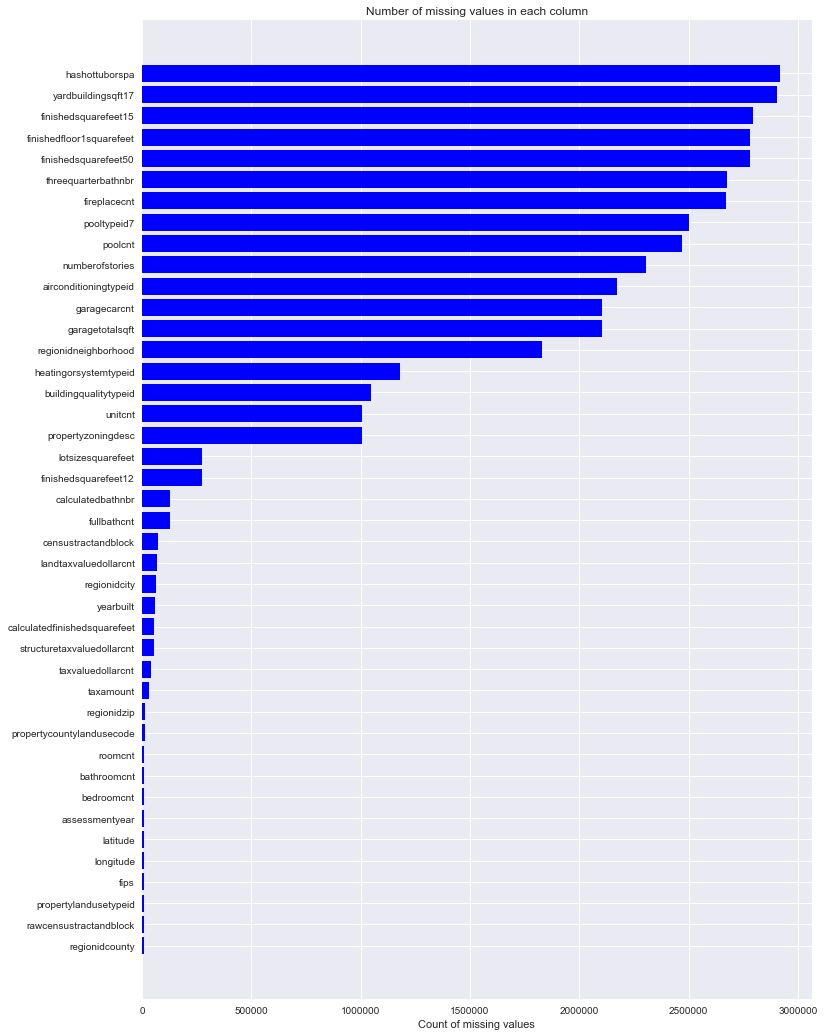

In [10]:
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.ix[missing_data['missing_count']>0]
missing_data = missing_data.sort_values(by='missing_count')

ind = np.arange(missing_data.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_data.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_data.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#This tool was used to merely identify the number of Nan values in each columns

In [136]:
# # Finding the different values in each column

# for a in data:
#     print "***********************"
#     print a
#     print data[a].value_counts(dropna=False) 
#     print "***********************\n\n"

#Removed as Notebook getting too large

In [14]:
#Finding number of NaN in each column in data

missingvaluescolsmerged = data.isnull().sum(axis=0).reset_index()
missingvaluescolsmerged.columns = ["name", "missingcount"]

missingvaluescolsmerged["ratio"]= (missingvaluescolsmerged['missingcount']*100/data.shape[0])
missingvaluescolsmerged


,name,missingcount,ratio
0,parcelid,0,0.000000
1,airconditioningtypeid,2173698,72.815410
2,bathroomcnt,11462,0.383959
3,bedroomcnt,11450,0.383557
4,buildingqualitytypeid,1046729,35.063749
5,calculatedbathnbr,128912,4.318346
6,finishedfloor1squarefeet,2782500,93.209304
7,calculatedfinishedsquarefeet,55565,1.861339
8,finishedsquarefeet12,276033,9.246664
9,finishedsquarefeet15,2794419,93.608572


In [15]:
#Deleting the irrelevant columns that have more than 80 percent NaN values in MERGED data

missingvaluescolsmerged = missingvaluescolsmerged.ix[missingvaluescolsmerged['ratio']>80]
data.drop(missingvaluescolsmerged["name"], axis=1, inplace=True)
data.shape

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


(2985217, 34)

In [16]:
#Since all the three columns bathroomcnt, calculatedbathnbr, fullbathcnt provide almost the same informtion, Lets
#keep only the most relevant paramnter i.e "bathroomcnt" which gives count of both full and fractional bathrooms

data.drop("calculatedbathnbr",axis=1, inplace=True)
data.drop("fullbathcnt", axis=1, inplace=True)

In [22]:
#Bathroomcount and Bedroom count are interpolated as only few values are missing

data['bathroomcnt'].interpolate(inplace=True)
print data['bathroomcnt'].value_counts(dropna=False)

data['bedroomcnt'].interpolate(inplace=True)
print data['bedroomcnt'].value_counts(dropna=False)

2.000000     1218664
3.000000      629353
1.000000      499338
2.500000      206859
4.000000      132076
0.000000      128055
1.500000       45888
5.000000       38242
3.500000       30755
4.500000       19017
6.000000       16252
7.000000        6149
5.500000        5747
8.000000        4537
9.000000        1329
6.500000        1217
10.000000        500
7.500000         380
12.000000        265
11.000000        207
8.500000         106
13.000000         52
9.500000          50
14.000000         45
16.000000         30
15.000000         24
0.500000          19
18.000000         15
10.500000         12
20.000000         10
17.000000          7
1.750000           5
19.000000          3
11.500000          3
12.500000          2
0.666667           1
1.333333           1
19.500000          1
14.500000          1
Name: bathroomcnt, dtype: int64
3.0     1169463
4.0      727052
2.0      605372
5.0      181222
0.0      132903
1.0       86610
6.0       48563
8.0       13555
7.0       12744
9.0  

In [137]:
# Finding relation between YearBuilt and BuildingQuality

valuecountings=0;

for i, row in data.iterrows():
    if row["buildingqualitytypeid"] == 1.0 and valuecountings<20:
        print row[["buildingqualitytypeid","yearbuilt"]]
        valuecountings+=1

buildingqualitytypeid       1.0
yearbuilt                1995.0
Name: 1246, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1988.0
Name: 1275, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1998.0
Name: 1276, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1985.0
Name: 1289, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1976.0
Name: 1331, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1976.0
Name: 1333, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1985.0
Name: 1354, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1984.0
Name: 1370, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1987.0
Name: 1378, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1990.0
Name: 1380, dtype: float64
buildingqualitytypeid       1.0
yearbuilt                1989.0
Name: 1400, dtype: float64

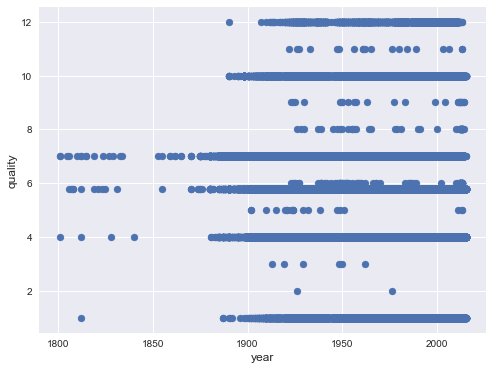

In [29]:
#plotting a Scatterplot for this relation

plt.figure(figsize=(8,6))

plt.scatter(data['yearbuilt'], data["buildingqualitytypeid"])
plt.xlabel('year', fontsize=12)
plt.ylabel('quality', fontsize=12)
plt.show()


#No relevant information can be deduced from the Yearbuilt and BuildingQuality.
#Older buildings also tend to have a higher Quality value

In [23]:
data["airconditioningtypeid"].fillna( -1, inplace=True)
data["airconditioningtypeid"].value_counts(dropna=False)

-1.0     2169265
 1.0      746797
 13.0      58457
 5.0        8795
 11.0       1818
 12.0         59
 9.0          19
 3.0           7
Name: airconditioningtypeid, dtype: int64

In [24]:
#Building Quality missing values replaced by mean

data["buildingqualitytypeid"].fillna(data["buildingqualitytypeid"].mean(), inplace=True)
data["buildingqualitytypeid"].value_counts(dropna=False)

7.000000     1133238
5.784787     1046729
4.000000      692160
1.000000       69467
10.000000      39713
12.000000       3692
6.000000          94
8.000000          51
9.000000          25
5.000000          21
11.000000         19
3.000000           6
2.000000           2
Name: buildingqualitytypeid, dtype: int64

In [26]:
#Finding the mmm of Calculated finsinhed sqaure feet

data["calculatedfinishedsquarefeet"].mean()

print data["calculatedfinishedsquarefeet"].median()

print data["calculatedfinishedsquarefeet"].mode()

data["calculatedfinishedsquarefeet"].interpolate(inplace=True)

1572.0
0    1440.0
dtype: float64


In [27]:
#Since calculatedfinishedsquarefee and finishedsquarefeet12 are almost identical, drop finishedsquarefeet12

data.drop("finishedsquarefeet12", axis=1, inplace=True)
data.shape

(2985217, 31)

In [28]:
data["garagecarcnt"].value_counts(dropna=False)

NaN      2101950
 2.0      660462
 1.0      177579
 3.0       19634
 0.0       14005
 4.0        8495
 5.0        1705
 6.0         575
 7.0         266
 8.0         181
 9.0         127
 10.0         78
 11.0         62
 12.0         41
 13.0         16
 14.0         14
 15.0          9
 17.0          4
 16.0          3
 19.0          3
 24.0          2
 20.0          2
 21.0          2
 18.0          1
 25.0          1
Name: garagecarcnt, dtype: int64

In [31]:
data["garagecarcnt"].fillna(-1, inplace=True)
data["garagecarcnt"].value_counts(dropna=False)

-1.0     2075662
 2.0      673634
 1.0      190695
 3.0       19634
 0.0       14005
 4.0        8495
 5.0        1705
 6.0         575
 7.0         266
 8.0         181
 9.0         127
 10.0         78
 11.0         62
 12.0         41
 13.0         16
 14.0         14
 15.0          9
 17.0          4
 16.0          3
 19.0          3
 24.0          2
 20.0          2
 21.0          2
 18.0          1
 25.0          1
Name: garagecarcnt, dtype: int64

In [43]:
           
data["garagetotalsqft"].fillna(-1, inplace=True)
data["garagetotalsqft"].value_counts(dropna=False)


-1.0       2101950
 0.0        196752
 400.0       33443
 360.0       29703
 441.0       26753
 462.0       25476
 460.0       23787
 440.0       22717
 420.0       20099
 483.0       17219
 480.0       12469
 437.0        9605
 430.0        8882
 456.0        8621
 504.0        8453
 451.0        8112
 484.0        5511
 396.0        5221
 471.0        4822
 380.0        4366
 472.0        4316
 600.0        3924
 450.0        3880
 560.0        3725
 506.0        3660
 630.0        3592
 418.0        3537
 410.0        3516
 468.0        3490
 588.0        3288
            ...   
 2226.0          1
 2230.0          1
 2231.0          1
 2233.0          1
 2235.0          1
 2236.0          1
 2237.0          1
 2241.0          1
 2203.0          1
 2196.0          1
 2194.0          1
 2193.0          1
 2124.0          1
 2125.0          1
 2129.0          1
 2137.0          1
 2141.0          1
 2150.0          1
 2152.0          1
 2154.0          1
 2159.0          1
 2160.0     

In [33]:
#Since this is a categorical variable, taking a mean or mode will alter the analysis significantly. Hence it is replaced by -1

data["heatingorsystemtypeid"].fillna(-1, inplace=True)
data["heatingorsystemtypeid"].value_counts(dropna=False)

-1.0     1178816
 2.0     1156830
 7.0      595453
 6.0       27480
 24.0      21107
 20.0       3216
 13.0       1342
 18.0        586
 1.0         262
 14.0         41
 10.0         39
 12.0         25
 11.0         16
 21.0          3
 19.0          1
Name: heatingorsystemtypeid, dtype: int64

In [34]:
#lotsizesquarefeet missing values replaced by median since mean is giving a very large number

# train["lotsizesquarefeet"].value_counts(dropna=False)
data["lotsizesquarefeet"].fillna(data["lotsizesquarefeet"].median(), inplace=True)
data["lotsizesquarefeet"].value_counts(dropna=False)

7000.0      288055
6000.0       44730
5000.0       17546
7200.0       15383
6500.0       11624
7500.0       10242
6600.0        7034
6300.0        6704
5500.0        6174
5400.0        5968
6750.0        5786
5200.0        5503
4000.0        5211
7499.0        4860
8000.0        4704
4500.0        4688
6100.0        4518
6200.0        4214
7800.0        4023
7700.0        3922
4800.0        3890
5999.0        3875
6250.0        3854
5100.0        3775
8400.0        3370
4999.0        3331
5001.0        3320
6120.0        3264
6001.0        3231
5600.0        3169
             ...  
57643.0          1
57641.0          1
57731.0          1
57739.0          1
57844.0          1
57743.0          1
57843.0          1
57840.0          1
57831.0          1
57822.0          1
57818.0          1
57817.0          1
57810.0          1
57804.0          1
57803.0          1
57800.0          1
57798.0          1
57788.0          1
57787.0          1
57783.0          1
57779.0          1
57777.0     

In [36]:
#Since a lot of data is missing and not in proper format. drop
data.drop("propertycountylandusecode",axis=1, inplace=True)
data.drop("censustractandblock",axis=1, inplace=True)

In [37]:
data["regionidcity"].interpolate(inplace=True)

# data["regionidcity"].value_counts(dropna=False)

# train["regionidcity"].mode()

In [38]:
#A lot of redundant information is available for location. Also this specific column has more than 50k Nan values. Hence, it must be dropped

data.drop("regionidneighborhood",axis=1, inplace=True)

In [39]:
#Since only a small number (35 only) of values are NaN, we use interpolation method for finding the missing values

data["regionidzip"].interpolate(inplace=True)

# data["regionidzip"].value_counts(dropna=False)

In [41]:

data["roomcnt"].interpolate(inplace=True)

data["roomcnt"].value_counts(dropna=False)

0.000000     2320342
6.000000      178357
7.000000      156397
8.000000      120227
5.000000       99582
9.000000       45241
4.000000       42322
10.000000      10862
3.000000        6289
11.000000       3021
12.000000       1097
2.000000         752
13.000000        313
14.000000        156
1.000000          77
15.000000         67
16.000000         35
18.000000         22
30.000000         14
17.000000          9
19.000000          6
21.000000          4
3.500000           3
20.000000          3
2.500000           2
67.000000          1
4.666667           1
96.000000          1
86.000000          1
84.000000          1
5.500000           1
77.000000          1
52.000000          1
56.000000          1
45.000000          1
42.000000          1
40.000000          1
31.000000          1
24.000000          1
22.000000          1
1.500000           1
2.333333           1
Name: roomcnt, dtype: int64

In [44]:
data["unitcnt"].fillna(-1, inplace=True)
data["unitcnt"].value_counts(dropna=False)

 1.0      1780051
-1.0      1007727
 2.0       115652
 4.0        39877
 3.0        39830
 5.0          588
 6.0          363
 8.0          178
 7.0          167
 10.0          97
 9.0           91
 12.0          52
 11.0          47
 13.0          35
 16.0          35
 14.0          32
 24.0          28
 20.0          20
 18.0          18
 15.0          17
 32.0          13
 17.0          12
 22.0          12
 27.0          11
 19.0           9
 30.0           9
 23.0           8
 26.0           8
 28.0           8
 21.0           7
           ...   
 131.0          1
 130.0          1
 83.0           1
 61.0           1
 256.0          1
 66.0           1
 68.0           1
 72.0           1
 73.0           1
 74.0           1
 75.0           1
 76.0           1
 77.0           1
 78.0           1
 79.0           1
 85.0           1
 125.0          1
 88.0           1
 91.0           1
 93.0           1
 96.0           1
 98.0           1
 101.0          1
 102.0          1
 112.0    

In [46]:
#Since a lot of data is missing and not in proper format. drop numberofstories

data.drop("numberofstories",axis=1, inplace=True)

In [47]:
#Since only a small number of values are NaN, we use interpolation method for finding the missing values

data["structuretaxvaluedollarcnt"].interpolate(inplace=True)

data["structuretaxvaluedollarcnt"].value_counts(dropna=False)

366172.0     11456
100000.0      1880
102461.0      1578
104510.0      1513
200000.0      1419
107401.0      1411
101998.0      1388
150000.0      1378
106600.0      1316
90000.0       1289
203996.0      1246
140000.0      1234
120000.0      1178
110000.0      1172
80000.0       1127
95000.0       1083
130000.0      1082
204922.0      1080
75000.0       1071
125000.0      1058
92000.0       1044
94000.0       1044
105000.0      1039
115000.0      1030
84000.0       1020
160000.0      1002
96000.0       1001
91000.0        994
89000.0        990
87000.0        990
             ...  
388429.0         1
388475.0         1
388473.0         1
388468.0         1
388462.0         1
388459.0         1
388456.0         1
388453.0         1
388446.0         1
388444.0         1
388440.0         1
388437.0         1
388435.0         1
388431.0         1
388428.0         1
388386.0         1
388417.0         1
1266685.0        1
388407.0         1
388405.0         1
388403.0         1
388402.0    

In [48]:
#Since only a small number of values are NaN, we use interpolation method for finding the missing values

data["taxamount"].interpolate(inplace=True)


data["taxamount"].value_counts(dropna=False)

7611.91000     11441
345.72000        171
1844.16000       124
1045.88000       110
5.02000          103
1481.24000       102
2623.08000        89
2264.43000        89
2266.14000        87
54.28000          83
1263.20000        81
2266.53000        80
2825.54000        76
343.52000         72
344.18000         71
285.30000         68
1664.22000        65
6363.00000        64
2082.38000        64
1192.72000        61
2171.60000        60
3303.42000        59
2280.12000        58
2815.12000        55
2137.28000        54
1043.60000        54
1827.46000        54
1050.72000        53
2958.84000        53
49.08000          51
               ...  
6507.48000         1
14847.24000        1
12920.86000        1
12920.61000        1
11460.71000        1
11460.46000        1
249.31000          1
248.69000          1
27381.01000        1
11323.79000        1
5828.32000         1
6426.77000         1
33735.54875        1
6501.23000         1
11323.04000        1
12921.61000        1
12921.86000  

In [50]:
#Since only a small number of values are NaN, we take MODE for finding the missing year

data["yearbuilt"].fillna(data["yearbuilt"].mode(), inplace=True)


data["yearbuilt"].value_counts(dropna=False)

 1955.0    88587
 1950.0    76142
 1954.0    73307
 1953.0    67085
 1956.0    65736
 1964.0    64929
NaN        59927
 1951.0    56686
 1963.0    54593
 1952.0    54405
 1947.0    53006
 1948.0    52711
 1989.0    52520
 1973.0    51464
 1965.0    49489
 1962.0    48494
 1949.0    48271
 1979.0    47514
 1959.0    47224
 1977.0    46663
 1957.0    46526
 1987.0    44851
 1972.0    44434
 1971.0    43022
 1978.0    42673
 1960.0    41931
 1976.0    41782
 1980.0    41392
 1990.0    41200
 1961.0    40205
           ...  
 1812.0        5
 1801.0        3
 1806.0        2
 1819.0        2
 1815.0        2
 1878.0        2
 1808.0        2
 1855.0        2
 1859.0        2
 1862.0        2
 1865.0        2
 1874.0        2
 1876.0        2
 1823.0        1
 1807.0        1
 1810.0        1
 1805.0        1
 1821.0        1
 1879.0        1
 1824.0        1
 1825.0        1
 1827.0        1
 1828.0        1
 1831.0        1
 1833.0        1
 1834.0        1
 1840.0        1
 1853.0       

In [51]:
#Since a lot of data is missing and not in proper format. drop propertyzoningdesc

data.drop("propertyzoningdesc",axis=1, inplace=True)

In [52]:
data["yearbuilt"].interpolate(inplace=True)
data["yearbuilt"].isnull().sum()

0

In [55]:
data.isnull().sum()

parcelid                            0
airconditioningtypeid               0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        2
fips                            11437
garagecarcnt                        0
garagetotalsqft                     0
heatingorsystemtypeid               0
latitude                        11437
longitude                       11437
lotsizesquarefeet                   0
propertylandusetypeid           11437
rawcensustractandblock          11437
regionidcity                        0
regionidcounty                  11437
regionidzip                         0
roomcnt                             0
unitcnt                             0
yearbuilt                           0
structuretaxvaluedollarcnt          2
taxvaluedollarcnt               42550
assessmentyear                  11439
landtaxvaluedollarcnt           67733
taxamount                           2
dtype: int64

In [56]:
#interpolation

data["taxamount"].interpolate(inplace=True)
data["fips"].interpolate(inplace=True)
data["latitude"].interpolate(inplace=True)
data["longitude"].interpolate(inplace=True)
data["propertylandusetypeid"].interpolate(inplace=True)
data["rawcensustractandblock"].interpolate(inplace=True)
data["regionidcounty"].interpolate(inplace=True)
data["structuretaxvaluedollarcnt"].interpolate(inplace=True)
data["taxvaluedollarcnt"].interpolate(inplace=True)
data["assessmentyear"].interpolate(inplace=True)
data["landtaxvaluedollarcnt"].interpolate(inplace=True)



In [61]:
data["calculatedfinishedsquarefeet"].fillna(data["calculatedfinishedsquarefeet"].mean(), inplace=True)
data["structuretaxvaluedollarcnt"].fillna(data["structuretaxvaluedollarcnt"].mean(), inplace=True)
data["taxamount"].fillna(data["taxamount"].mean(), inplace=True)


In [63]:
data.shape

(2985217, 26)

In [67]:
train = pd.merge(train, data, on='parcelid', how='left')
print train


       parcelid  logerror transactiondate  airconditioningtypeid  bathroomcnt  \
0      11016594    0.0276      2016-01-01                    1.0          2.0   
1      14366692   -0.1684      2016-01-01                   -1.0          3.5   
2      12098116   -0.0040      2016-01-01                    1.0          3.0   
3      12643413    0.0218      2016-01-02                    1.0          2.0   
4      14432541   -0.0050      2016-01-02                   -1.0          2.5   
5      11509835   -0.2705      2016-01-02                    1.0          4.0   
6      12286022    0.0440      2016-01-02                   -1.0          1.0   
7      17177301    0.1638      2016-01-02                   -1.0          2.5   
8      14739064   -0.0030      2016-01-02                   -1.0          1.0   
9      14677559    0.0843      2016-01-03                   -1.0          2.0   
10     10854446    0.3825      2016-01-03                   -1.0          2.0   
11     11672170   -0.0161   

In [94]:
trainy = train
train.shape

(90275, 28)

In [69]:
train.to_csv("/Users/soham/Desktop/DSF/hi.csv")





Q1) Do a pairwise Pearson correlation analysis on all interesting pairs of variables. Show the result with heat map and find out most positive and negative correlations.



In [ ]:
# print(data.corr())

In [190]:
np.correlate(train["buildingqualitytypeid"], train["logerror"])



array([ 3022.3741])

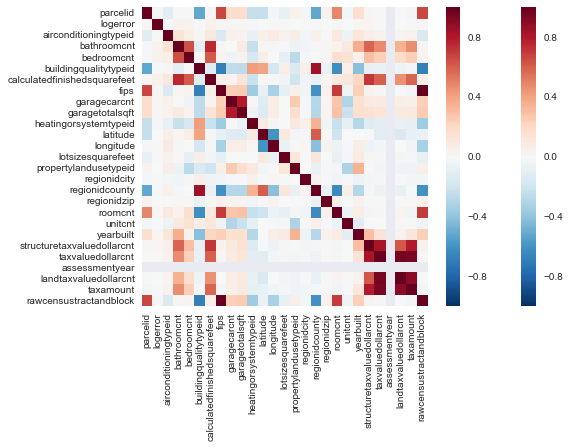

In [198]:
ax = sns.heatmap(train.corr())
plt.show()





Q2) Produce five other informative plots revealing aspects of this data.




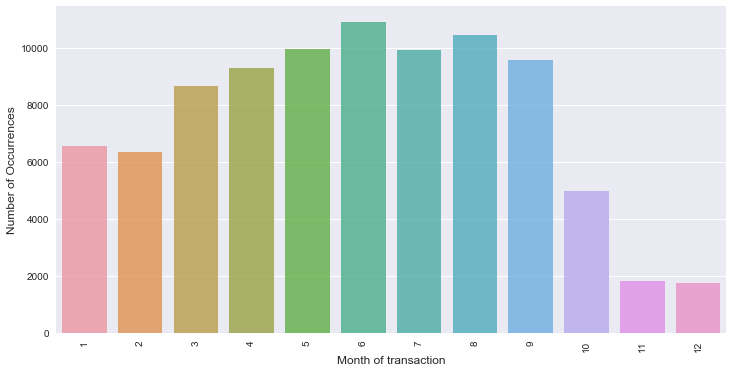

In [204]:
train['transactiondate'] = pd.to_datetime(train['transactiondate'])

train['transaction_month'] = train['transactiondate'].dt.month

cnt_srs = train['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

#This is a bar chart showing the month of the transactions and the number of occurances of each sale. This is done 
# by making the transactiondate as a datetime object. The month is extracted and the relevant information is available
#This tool is used to merely find the number of transcations done in each month

In [208]:
(train['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

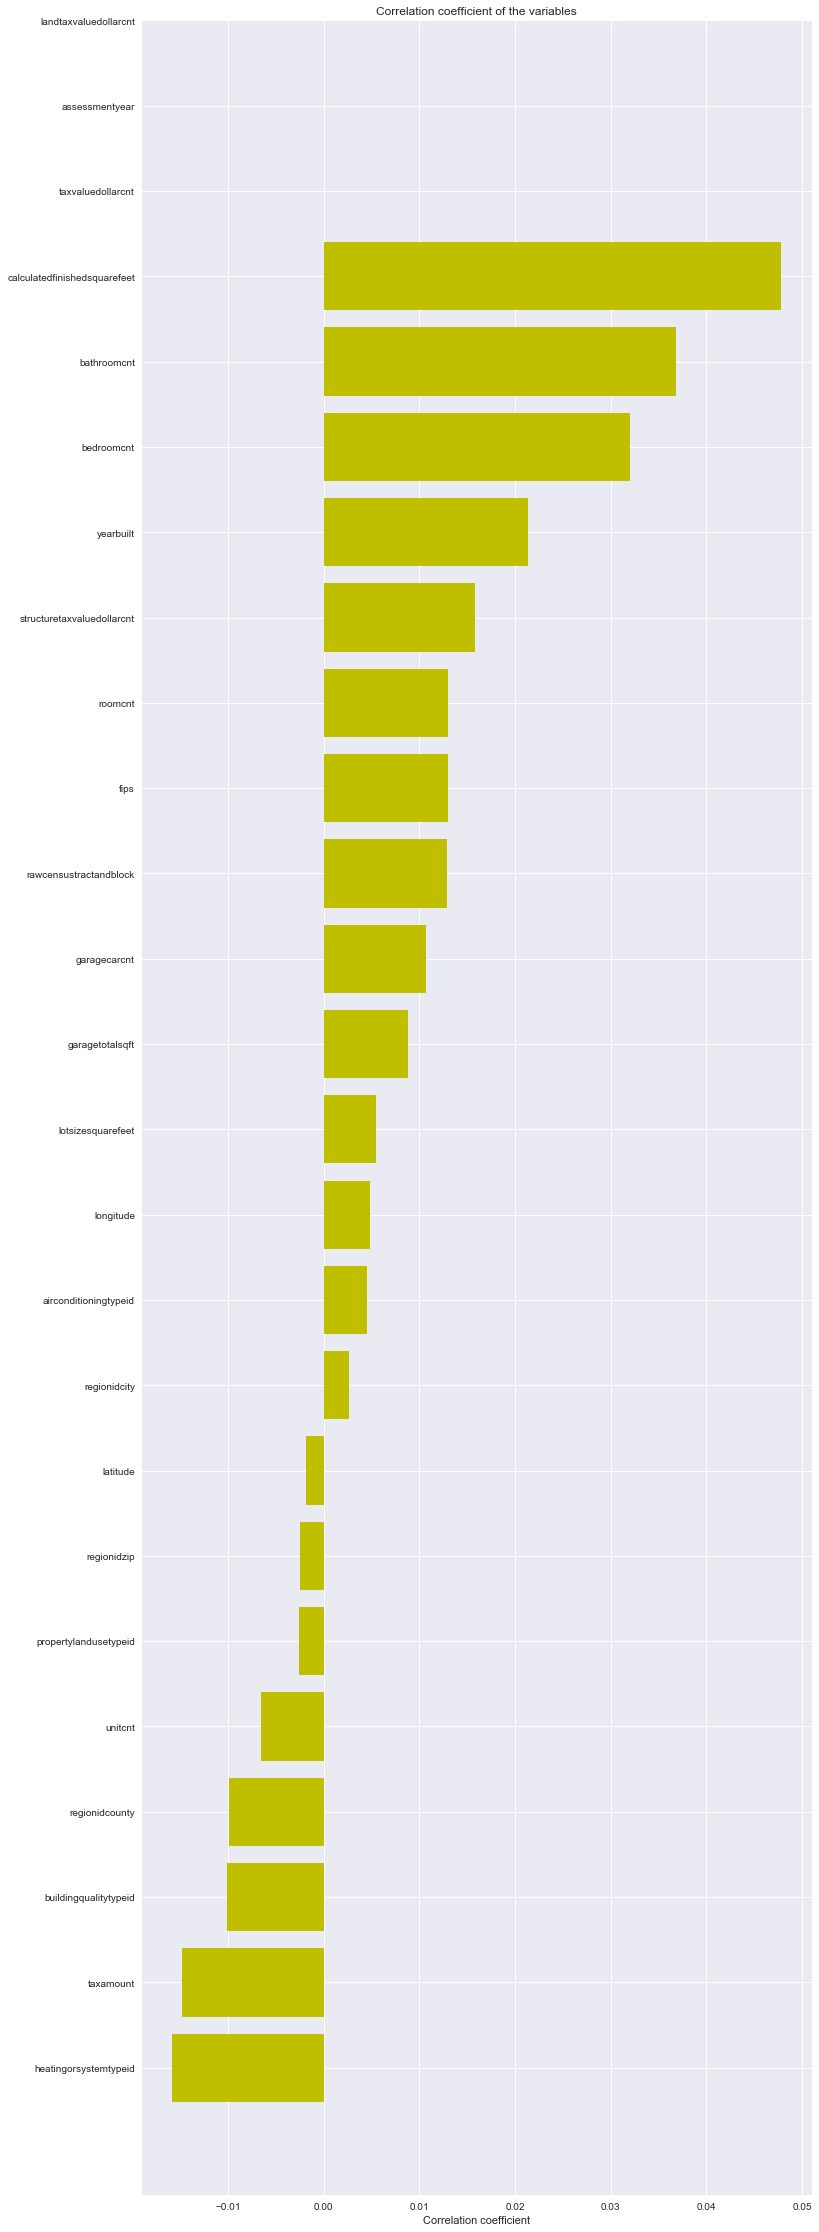

In [217]:
x_cols = [col for col in trainynew.columns if col not in ['logerror'] if trainynew[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(trainynew[col].values, trainynew.logerror.values)[0,1])
corr_train = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_train = corr_train.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_train.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_train.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()


#The following is a plot obtained by comparing the logerror with each of the column values of the train dataset
#This can give insigths into the correlation between the columns 
#This tool was available in the discussion which is merely used to identify the correlation of each columns with logerror

In [160]:
data.columns

Index([u'airconditioningtypeid', u'bathroomcnt', u'bedroomcnt',
       u'buildingqualitytypeid', u'calculatedfinishedsquarefeet', u'fips',
       u'garagecarcnt', u'garagetotalsqft', u'heatingorsystemtypeid',
       u'latitude', u'longitude', u'lotsizesquarefeet',
       u'propertylandusetypeid', u'rawcensustractandblock', u'regionidcity',
       u'regionidcounty', u'regionidzip', u'roomcnt', u'unitcnt', u'yearbuilt',
       u'structuretaxvaluedollarcnt', u'taxvaluedollarcnt', u'assessmentyear',
       u'landtaxvaluedollarcnt', u'taxamount', u'parcelid'],
      dtype='object')

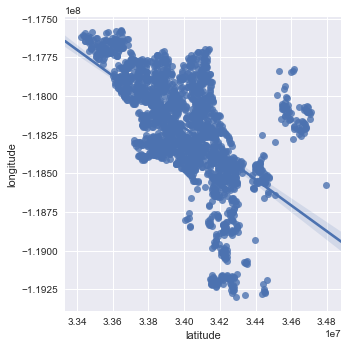

In [175]:
import matplotlib.pyplot as plt

sample = data.sample(n=2000)

sns.set_style("darkgrid")

sns.lmplot(x='latitude', y='longitude', data= sample)

plt.show()

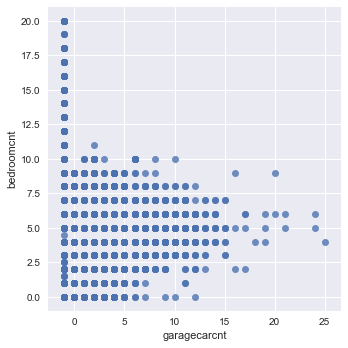

In [157]:
sns.lmplot(x='garagecarcnt', y='bedroomcnt', data=data, fit_reg=False )
plt.show()

#This is a scatterplot obtained by plotting the garagecount and bedroomcount. As the number of bedroomcnt goes high, the 
# number of garages reamins zero

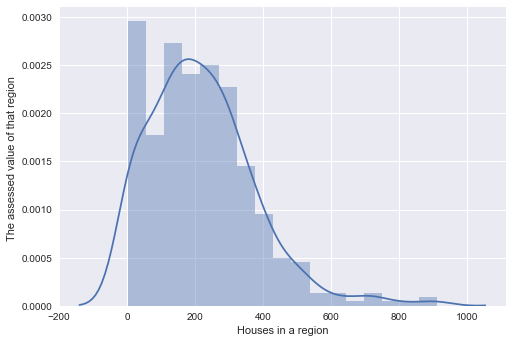

In [104]:
group = train.groupby(['regionidzip'])['landtaxvaluedollarcnt']
group.describe()
fig = sns.distplot(group.count())
fig.set(xlabel='Houses in a region', ylabel='The assessed value of that region ')
plt.show()

#This is the distplot function of pandas where not only a histogram is plotted but an estimated PDF is also plotted
#A plot is obtained which shows the relation of a region zip and its corresponding assessed value



In [101]:
train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,garagecarcnt,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.000000,1684.0,6037.0,-1.0,...,3101.0,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88
1,14366692,-0.1684,2016-01-01,-1.0,3.5,4.0,5.784787,2263.0,6059.0,2.0,...,1286.0,96962.0,0.0,-1.0,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.000000,2217.0,6037.0,-1.0,...,3101.0,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.000000,839.0,6037.0,-1.0,...,3101.0,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74
4,14432541,-0.0050,2016-01-02,-1.0,2.5,4.0,5.784787,2283.0,6059.0,2.0,...,1286.0,96961.0,8.0,-1.0,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96








Q3). Set up a simple linear regression model on one or more variables to predict the logerror as a function of other variables.





In [181]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


trainy = trainy.drop(["parcelid", "logerror", "transactiondate"], axis=1)      
target = train["logerror"].values
feature_names = trainy.columns.values

print "The Lineaer Regression Model is implemented and the following are the results:"

X_train, X_test, Y_train, Y_test = train_test_split(trainy, target, test_size=0.3)
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train, Y_train)
Y_prediction = reg.predict(X_test)

print Y_prediction.shape

#Finding the mean sqaured error
print("Mean squared error: %f" %mean_squared_error(Y_test, Y_prediction))
print("Mean absolute error: %f" %mean_absolute_error(Y_test, Y_prediction))
print("Variance score: %f" %reg.score(X_test, Y_test))



The Lineaer Regression Model is implemented and the following are the results:
(27083,)
Mean squared error: 0.024368
Mean absolute error: 0.068150
Variance score: 0.003045





Q4) Try to build a better prediction model that works somewhat harder to solve the task.  Perhaps it will preprocess features better (e.g. normalize or scale the input vector, convert non-numerical value into float, or do a special treatment of missing values).   Perhaps it will use a different machine learning approach (e.g. nearest neighbors, random forests, etc).




In [184]:
#Implementing Ridge Regression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

     
target = train["logerror"].values

feature_names = trainy.columns.values

print "The Ridge Regression Model is implemented and the following are the results:"

X_train_ridge, X_test_ridge, Y_train_ridge, Y_test_ridge = train_test_split(trainy, target, test_size=0.3)

ridge = linear_model.Ridge(alpha=0.2)
ridge.fit(X_train_ridge, Y_train_ridge)
Y_prediction_ridge = ridge.predict(X_test_ridge)

# print "The co oefficients are given as:", ridge.coef_
print("Mean squared error: %f" %mean_squared_error(Y_test_ridge, Y_prediction_ridge))
print("Mean absolute error: %f" %mean_absolute_error(Y_test_ridge, Y_prediction_ridge))




The Ridge Regression Model is implemented and the following are the results:
Mean squared error: 0.025486
Mean absolute error: 0.068337


In [183]:
#Implementing Lasso Regression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


target = train["logerror"].values
feature_names = trainy.columns.values


X_train_lasso, X_test_lasso, Y_train_lasso, Y_test_lasso = train_test_split(trainy, target, test_size=0.3)

lasso = linear_model.Lasso(alpha=10.0)
lasso.fit(X_train_lasso, Y_train_lasso)
Y_prediction_lasso = lasso.predict(X_test_lasso)

# print "The coefficients are:", lasso.coef_

print "The Lasso Regression Model is implemented and the following are the results:"

print("Mean squared error: %f" %mean_squared_error(Y_test_lasso, Y_prediction_lasso))
print("Mean absolute error: %f" %mean_absolute_error(Y_test_lasso, Y_prediction_lasso))



The Lasso Regression Model is implemented and the following are the results:
Mean squared error: 0.025907
Mean absolute error: 0.068834


In [129]:
# trainy = trainy.iloc[:, 1:]

trainy.columns

Index([u'airconditioningtypeid', u'bathroomcnt', u'bedroomcnt',
       u'buildingqualitytypeid', u'calculatedfinishedsquarefeet', u'fips',
       u'garagecarcnt', u'garagetotalsqft', u'heatingorsystemtypeid',
       u'latitude', u'longitude', u'lotsizesquarefeet',
       u'propertylandusetypeid', u'rawcensustractandblock', u'regionidcity',
       u'regionidcounty', u'regionidzip', u'roomcnt', u'unitcnt', u'yearbuilt',
       u'structuretaxvaluedollarcnt', u'taxvaluedollarcnt', u'assessmentyear',
       u'landtaxvaluedollarcnt', u'taxamount'],
      dtype='object')

In [127]:
data.columns
# originaldata=pd.read_csv("/Users/soham/Desktop/DSF/properties_2016.csv")

# data['parcelid'] = originaldata['parcelid']

Index([u'airconditioningtypeid', u'bathroomcnt', u'bedroomcnt',
       u'buildingqualitytypeid', u'calculatedfinishedsquarefeet', u'fips',
       u'garagecarcnt', u'garagetotalsqft', u'heatingorsystemtypeid',
       u'latitude', u'longitude', u'lotsizesquarefeet',
       u'propertylandusetypeid', u'rawcensustractandblock', u'regionidcity',
       u'regionidcounty', u'regionidzip', u'roomcnt', u'unitcnt', u'yearbuilt',
       u'structuretaxvaluedollarcnt', u'taxvaluedollarcnt', u'assessmentyear',
       u'landtaxvaluedollarcnt', u'taxamount', u'parcelid'],
      dtype='object')

In [126]:
datay = pd.DataFrame(data)
                    
datay.drop("parcelid", axis=1, inplace=True)






Q5) Predict all the logerror for instances at file “sample_submission.csv”. Write the result into a csv file and submit it to the website. Report the score you get.


Ranking Obtained : 2533
Name: sohammehta95
Score : 0.0652044







In [117]:
#Testing the Linear Regression model to pedict the future values

X_test_datay = datay

Y_prediction_datay = reg.predict(X_test_datay)

print Y_prediction_datay.shape


(2985217,)


In [130]:
# originaldata=pd.read_csv("/Users/soham/Desktop/DSF/properties_2016.csv")

final = pd.DataFrame(data["parcelid"])
final.shape


(2985217, 1)

In [131]:
final['201610'] = Y_prediction_datay
final['201611'] = Y_prediction_datay
final['201612'] = Y_prediction_datay
final['201710'] = Y_prediction_datay
final['201711'] = Y_prediction_datay
final['201712'] = Y_prediction_datay

In [132]:
final.shape

(2985217, 7)

In [133]:
final.to_csv("/Users/soham/Desktop/DSF/submit.csv", index=False)


FINAL SCORE ON KAGGLE

Ranking Obtained : 2533

Name: sohammehta95

Score : 0.0652044

Screenshot attahced in the folder
Report attached as PDF in the folder